In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
from scipy.sparse import csgraph
import numpy as np

In [3]:
import cugraph

In [9]:
import torch
r = torch.randn(10, 3, 3)
x = torch.randn(10, 1, 3)

t = torch.randn(10, 3)
x = (x @ r.transpose(-1, -2)) + t.unsqueeze(-2)
x.shape

torch.Size([10, 1, 3])

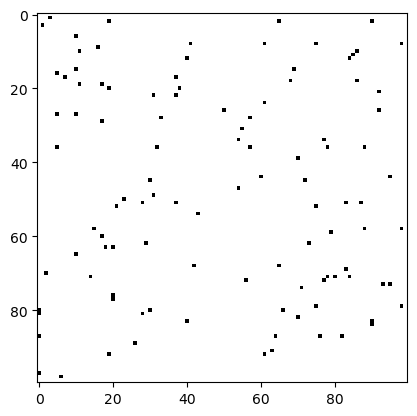

In [4]:
graph = torch.rand(100, 100) < 0.01
g = cugraph.from_numpy_array(graph.int().numpy())
cc0 = cugraph.connected_components(g)
plt.imshow(graph, cmap='gray_r')

In [5]:
descs = torch.randn(100, 512)
p2ds = torch.rand(100, 2)
B = 10
N = 10
poses = torch.randn(B, 4, 4)
batch_idx = torch.randperm(100) % B
p3ds = torch.randn(100, 3)

In [6]:
import uuid
import pandas as pd

In [14]:
import uuid
import pandas as pd
landmark_df = cc0.groupby('labels', as_index=False).agg({'vertex': 'collect'}).to_pandas()
landmark_df['feature'] = landmark_df['vertex'].apply(lambda idx: descs[idx].nanmean(0).tolist())
landmark_df['xyz'] = landmark_df['vertex'].apply(lambda idx: p3ds[idx].nanmean(0).tolist())
feature_df = landmark_df[['feature']].rename(columns={'feature': 'data'})
feature_df['feature_id'] = feature_df.index.map(lambda _: uuid.uuid4().hex)
landmark_df['feature_id'] = feature_df['feature_id']
landmark_df.drop(columns=['feature'], inplace=True)
landmark_df['landmark_id'] = landmark_df.index.map(lambda _: uuid.uuid4().hex)
keypoint_df = pd.DataFrame.from_dict({'keypoint_id': [uuid.uuid4().hex for _ in range(len(p2ds))], 'xy': p2ds.tolist()})
landmark_df['keypoint_ids'] = landmark_df['vertex'].apply(lambda idx: [keypoint_df.iloc[i]['keypoint_id'] for i in idx]) 

for idx, (lid, kids) in landmark_df[['landmark_id', 'keypoint_ids']].iterrows():
    for kid in kids:
        keypoint_df.loc[keypoint_df['keypoint_id'] == kid,'landmark_id'] = lid
keyframe_df = pd.DataFrame.from_dict({'keyframe_id': [uuid.uuid4().hex for _ in range(B)], 'pose': poses.view(-1, 16).tolist()})
keypoint_df['keyframe_index'] = batch_idx.int().flatten().tolist()
keypoint_df['keyframe_id'] = keypoint_df['keyframe_index'].map(lambda idx: keyframe_df.iloc[idx]['keyframe_id'])
keyframe_df['keypoint_ids'] = keyframe_df['keyframe_id'].map(lambda kid: keypoint_df[keypoint_df['keyframe_id'] == kid]['keypoint_id'].tolist())
landmark_df.drop(columns=['vertex', 'labels'], inplace=True)

In [20]:
feature_df['data'].tolist()

[[-0.18710318207740784,
  1.348219633102417,
  -0.41588038206100464,
  0.4254757761955261,
  -1.132269024848938,
  0.6454055309295654,
  0.5427020788192749,
  -0.2884250283241272,
  0.7691739201545715,
  -0.37308916449546814,
  0.25797784328460693,
  0.1859840750694275,
  -0.5547502636909485,
  0.7381678223609924,
  0.4733371436595917,
  -0.455119788646698,
  0.5967211723327637,
  -0.33875322341918945,
  0.4305662214756012,
  -0.698484480381012,
  -1.5868520736694336,
  0.5954009294509888,
  1.087796688079834,
  -0.22510243952274323,
  0.21706359088420868,
  0.35252636671066284,
  -0.7016149759292603,
  1.3426023721694946,
  0.31812915205955505,
  -0.8246461153030396,
  0.2520134747028351,
  0.38525956869125366,
  -0.6126497387886047,
  1.214020848274231,
  0.6503664255142212,
  0.40319371223449707,
  1.7604299783706665,
  0.017178654670715332,
  -0.26039817929267883,
  -0.3786808252334595,
  -0.8958743810653687,
  0.09661121666431427,
  0.3100760579109192,
  -0.9618999361991882,
  -0.

In [19]:
keypoint_df['xy']

[[0.00480198860168457, 0.08576101064682007],
 [0.7710254788398743, 0.13287901878356934],
 [0.9280955195426941, 0.8713318109512329],
 [0.9691140651702881, 0.8673020601272583],
 [0.025542378425598145, 0.8855969309806824],
 [0.45774954557418823, 0.03368276357650757],
 [0.18224573135375977, 0.23663532733917236],
 [0.5195978283882141, 0.9524297714233398],
 [0.9908220767974854, 0.9178628325462341],
 [0.7717699408531189, 0.16618168354034424],
 [0.3977932333946228, 0.19639891386032104],
 [0.0017768144607543945, 0.31415021419525146],
 [0.7743849754333496, 0.46273523569107056],
 [0.8337607383728027, 0.18655318021774292],
 [0.5137718319892883, 0.2749512791633606],
 [0.7806689143180847, 0.8492306470870972],
 [0.03774195909500122, 0.2601075768470764],
 [0.8831960558891296, 0.3428141474723816],
 [0.5878770351409912, 0.6600424647331238],
 [0.9647017121315002, 0.39558666944503784],
 [0.766245424747467, 0.6516581177711487],
 [0.6375114917755127, 0.8600277900695801],
 [0.7978270053863525, 0.777165591716

In [17]:
landmark_df['xyz'].tolist()

[[-0.4002686142921448, 0.05410867929458618, -0.3948478698730469],
 [0.10569127649068832, 0.01385912112891674, -0.0905236303806305]]